# ***California Housing Price***


### Business Problem Understanding

`Context`

According to Investopedia, "Real estate is defined as the land and any permanent structures, like a home, or improvements attached to the land, whether natural or man-made. Real estate is a form of real property. It differs from personal property, which is not permanently attached to the land, such as vehicles, boats, jewelry, furniture, and farm equipment."

Housing is a type of real estate that refers to the construction and assigned usage of houses or buildings individually or collectively, for the purpose of shelter. Housing ensures that members of society have a place to live, whether it is a home or some other kind of dwelling, lodging or shelter.

California is a state in the Western United States, located along the Pacific Coast. With nearly 39.2 million residents across a total area of approximately 163,696 square miles (423,970 km2), it is the most populous and the third-largest U.S. state by area. It is also the most populated subnational entity in North America and the 34th most populous in the world.

`Problem Statement`

California, being the most populous state in the U.S. means that the housing demand is also high in this state. **With an increasing number of housing properties in California, it's crucial to find the right price to stay competitive in California's neighborhood.**

`Goals`

California realtors certainly needs to have a 'tool' that **can predict and help determine the fair housing price for each property that they are going to sell**. The differences in the various features found in a property can increase the accuracy of housing price predictions, which can bring profit for the realtor, and of course, be affordable for the buyer.

A predictive tool that can provide fair price predictions can increase the number of buyers. In other words, more buyers mean that the  revenue can increase.

`Analytic Approach`

We need to analyze the data to find patterns of the existing features that distinguish one property from another. We will build a regression model to help realtors provide a housing price prediction tool for newly listed properties, which will be helpful for realtors in determining the price of the listing.

`Metrics Evaluation`

The evaluation metrics that will be used are RMSE, MAE, and MAPE. RMSE is the mean value of the square root of the error, MAE is the mean absolute value of the error, whereas MAPE is the average percentage error generated by the regression model. The smaller the RMSE, MAE, and MAPE values, the more accurate the model is in predicting the rental price according to the features' limitations.

In addition, we can also use the value of R-squared or adj. R-squared if the model selected as the final model is a linear one. The R-squared value is used to determine how well the model can represent the overall variance of the data. The closer the value to 1, the more fit the model is to the observation data. However, this metric is not valid for non-linear models.


- The dataset is California Housing Price.
- Each row of data represents information regarding the property.

**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| longitude | Float | Longitude coordinates |
| latitude | Float | Latitude coordinates |
| housing_median_age | Float | Housing median age |
| total_rooms | Float | Total number of rooms |
| total_bedrooms | Float | Total number of bedrooms |
| population | Float | Total number of Population |
| households | Float | Total number of households |
| median_income | Float | Median Income of households |
| ocean_proximity | Object | Proximity in the ocean |
| median_house_value | Float | Price in dollars |

<br>

In [25]:
# Import libraries for exploring dataset
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To hide warning
import warnings
warnings.filterwarnings('ignore')

In [26]:
# Load dataset
df = pd.read_csv('data_california_house.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0


In [27]:
# Check more detailed info on each feature
listItem = []

for col in df.columns:
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col]))*100, 2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

df_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,longitude,float64,0,0.00,806,"[-117.23, -118.68]"
1,latitude,float64,0,0.00,836,"[38.07, 32.67]"
2,housing_median_age,float64,0,0.00,52,"[44.0, 35.0]"
3,total_rooms,float64,0,0.00,5227,"[2989.0, 2397.0]"
4,total_bedrooms,float64,137,0.95,1748,"[149.0, 1612.0]"
5,population,float64,0,0.00,3498,"[672.0, 2251.0]"
6,households,float64,0,0.00,1649,"[1593.0, 2116.0]"
7,median_income,float64,0,0.00,9797,"[3.2564, 2.9624]"
8,ocean_proximity,object,0,0.00,5,"[<1H OCEAN, ISLAND]"
9,median_house_value,float64,0,0.00,3548,"[99800.0, 142500.0]"


<AxesSubplot:>

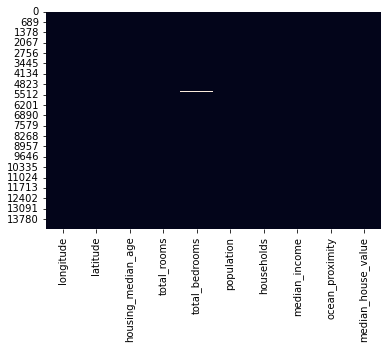

In [28]:
# Missing values heatmap
sns.heatmap(df.isnull(), cbar=False)

In [29]:
# Check data duplicates
df.duplicated().sum()

0

Only the 'total_bedrooms' feature has missing values, comprising of almost 1% of the data. In addition, we can also know that there are no duplicate data in the dataset by using the duplicated( ) function.

### Filling Missing Values

In [30]:
# Iterative Imputing

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [31]:
iter_impute = IterativeImputer()
df[['total_rooms', 'total_bedrooms']] = iter_impute.fit_transform(df[['total_rooms', 'total_bedrooms']])
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14448 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


### Data Correlation

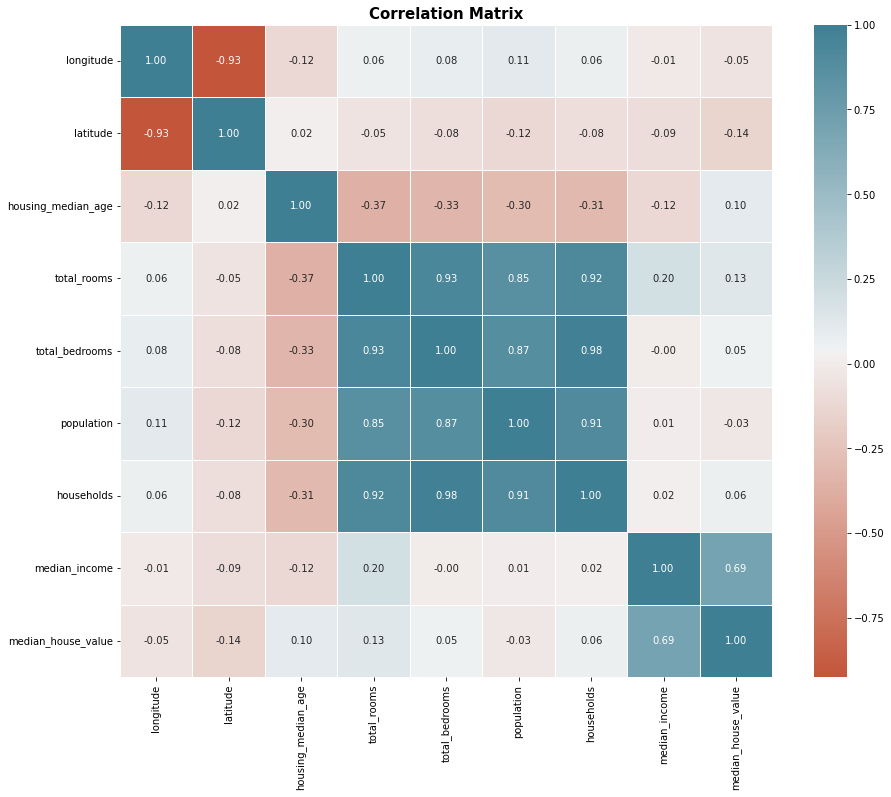

In [33]:
# Correlation matrix
plt.figure(figsize=(15, 12))
palette=sns.diverging_palette(20, 220, n=256)
corr = df.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt='.2f', cmap=palette, square=True, linewidths=.5)
plt.title('Correlation Matrix', size=15, weight='bold');

There is a strong positive correlation between the following features:
- median income and median house value: maybe because those who has higher median income can afford a house with higher value.
- households and population: this is reasonable because as number of households increases, the population also increases.
- total rooms and total bedrooms
- total rooms and population
- total rooms and households
- total bedrooms and population
- total bedrooms and households

Meanwhile, there is a strong negative correlation between longitude and latitude.

### Check outliers

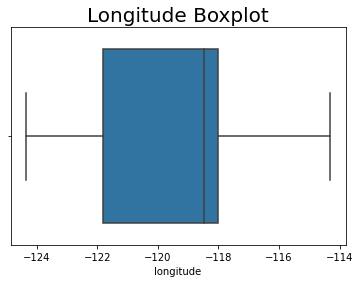

In [34]:
sns.boxplot(df['longitude'])
plt.title('Longitude Boxplot', size = 20)
plt.show()

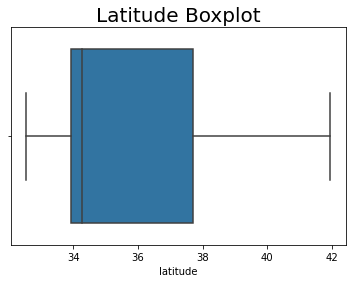

In [35]:
sns.boxplot(df['latitude'])
plt.title('Latitude Boxplot', size = 20)
plt.show()

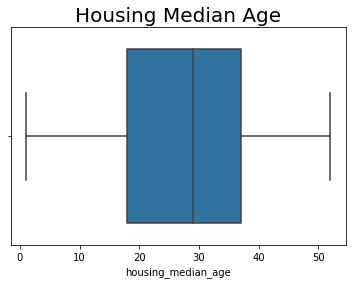

In [36]:
sns.boxplot(df['housing_median_age'])
plt.title('Housing Median Age', size = 20)
plt.show()

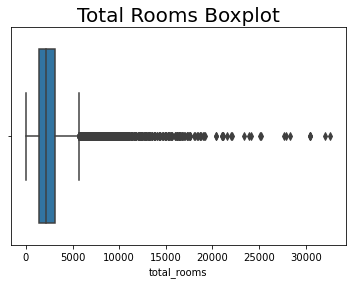

In [37]:
sns.boxplot(df['total_rooms'])
plt.title('Total Rooms Boxplot', size = 20)
plt.show()

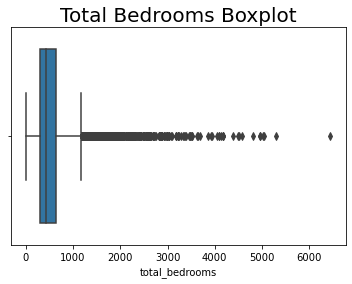

In [38]:
sns.boxplot(df['total_bedrooms'])
plt.title('Total Bedrooms Boxplot', size = 20)
plt.show()

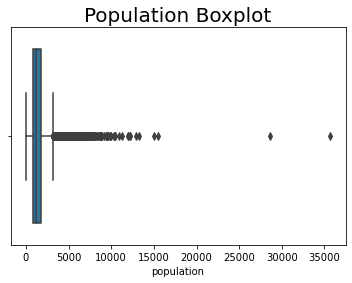

In [39]:
sns.boxplot(df['population'])
plt.title('Population Boxplot', size = 20)
plt.show()

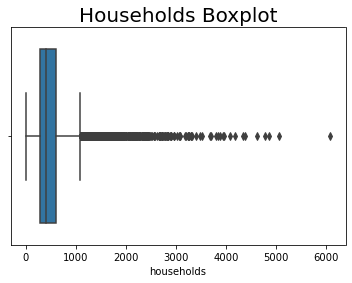

In [40]:
sns.boxplot(df['households'])
plt.title('Households Boxplot', size = 20)
plt.show()

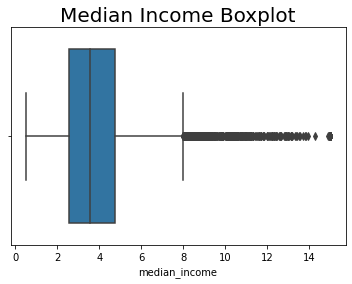

In [41]:
sns.boxplot(df['median_income'])
plt.title('Median Income Boxplot', size = 20)
plt.show()

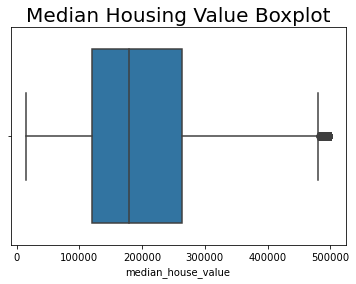

In [42]:
sns.boxplot(df['median_house_value'])
plt.title('Median Housing Value Boxplot', size = 20)
plt.show()

From the plots above, we can see that there are a lot of outliers in this dataset especially in the following features: Total_Rooms, Total_Bedrooms, Population, Households, Median_Income, and Median House Value.

### Encoding

One Hot Encoder will be applied to 'Ocean Proximity' feature since it is a categorical variable.

In [43]:
!pip install category_encoders

In [44]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [45]:
onehot = OneHotEncoder(handle_unknown = 'ignore')

transformer = ColumnTransformer([
                                ('one hot', onehot, ['ocean_proximity'])
], remainder='passthrough')

# Modeling

In [46]:
!pip install xgboost

In [47]:
# Import libraries for modeling

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [48]:
## Data Splitting
X = df.drop(['median_house_value'], axis=1)
y = df['median_house_value']

In [49]:
# Splitting X and y into training and test sets with a 70:30 proportion
X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,  
    test_size=0.3,
    random_state=1)

In [50]:
# Define the algorithms
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1)
xgb = XGBRegressor(random_state=1)

# Modeling is done on a logarithmic scale, but the scale is inverted back afterward for interpretation
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

# Scaling data
scaler = StandardScaler()

# Algorithms for the base model
models = [log_lr, log_knn, log_dt, log_rf, log_xgb]

score_rmse = []
mean_rmse = []
std_rmse = []

score_mae = []
mean_mae = []
std_mae = []

score_mape = []
mean_mape = []
std_mape = []

# Finding the best algorithm based on metrics value
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    mean_rmse.append(model_cv_rmse.mean())
    std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    mean_mae.append(model_cv_mae.mean())
    std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    mean_mape.append(model_cv_mape.mean())
    std_mape.append(model_cv_mape.std())

[-88406.40638985 -87105.11542873 -93355.87945843 -91791.1080408
 -76837.72158205] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-51618.87882077 -54114.72754381 -51148.07183004 -50297.06455752
 -50009.21012681] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-0.26660103 -0.26426163 -0.25612907 -0.25628903 -0.26340822] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-62361.27294481 -64841.00679904 -62498.55583636 -61095.03190274
 -63396.07685355] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-41349.59933634 -43186.97887785 -41722.867794   -40660.35789522
 -42893.1455498 ] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
 

In [51]:
# Evaluation of the algorithms' result
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_RMSE': mean_rmse,
    'Std_RMSE': std_rmse,
    'Mean_MAE': mean_mae,
    'Std_MAE': std_mae,
    'Mean_MAPE': mean_mape,
    'Std_MAPE': std_mape
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,-87499.246180,5785.613486,-51437.590576,1457.725570,-0.261338,0.004316
1,KNN Regressor,-62838.388867,1241.282729,-41962.589891,948.060599,-0.220628,0.004951
2,DecisionTree Regressor,-71520.016030,2557.212906,-46594.192101,1170.657220,-0.252166,0.006957
3,RandomForest Regressor,-51586.981055,2158.374260,-33253.644574,1271.853198,-0.176656,0.004974
4,XGBoost Regressor,-49848.265476,2207.310558,-32651.250583,1258.789860,-0.172996,0.004118


Based on RMSE, MAE, and MAPE, XGBoost is the best model to predict the housing price based on the given dataset.

**Predict to Test Set with the Benchmark Model**

In [52]:
# Benchmark models
models = {
    'XGB': XGBRegressor(random_state=1)
}

score_rmse = []
score_mae = []
score_mape = []

# Predict to test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'MAE': score_mae, 'RMSE': score_rmse, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,MAE,RMSE,MAPE
XGB,33136.296166,50629.133836,0.179831


**Hyperparameter Tuning**

In [53]:
# Max depth
max_depth = list(np.arange(1, 11))

# Learning rate
learning_rate = list(np.arange(1, 100)/100)

# The number of trees
n_estimators = list(np.arange(100, 201))

# The number of rows of each tree (% of total rows in the training set)
subsample = list(np.arange(2, 10)/10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11)) # The higher the value, the more conservative/simple the model

# The number of featuers used in each tree (% of total columns in the training set)
colsample_bytree = list(np.arange(1, 10)/10)

# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10)) # The higher the value, the more conservative/simple the model

# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

In [54]:
# Redefine the benchmark model
xgb = XGBRegressor(random_state=1, verbosity=0)

# Define algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_mean_absolute_error', # Can only choose one of the metrics for optimization
    random_state = 1  
)

In [55]:
# Fitting the training data training to find the most optimum parameters value
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('one '
                                                                               'hot',
                                                                               OneHotEncoder(handle_unknown='ignore'),
                                                                               ['ocean_proximity'])])),
                                             ('scaler', StandardScaler()),
                                             ('model',
                                              XGBRegressor(base_score=None,
                                                           booster=None,
                                                           callbacks=None,
                            

In [56]:
# Check the tuning result in a DataFrame. Sorted by MAE, RMSE & MAPE
pd.DataFrame(random_xgb.cv_results_).sort_values(by=['rank_test_neg_mean_absolute_error', 'rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__gamma,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
7,4.494588,0.193963,0.038535,0.006014,0.9,0.059948,119,8,0.05,5,...,1021.346674,1,-0.189065,-0.179655,-0.174137,-0.175126,-0.183937,-0.180384,0.005571,1
20,2.308951,0.033301,0.025599,0.003194,0.9,0.007743,143,4,0.38,6,...,745.255825,2,-0.202189,-0.193049,-0.194505,-0.195313,-0.195861,-0.196183,0.003149,2
17,4.271555,0.114496,0.041506,0.007752,0.6,0.001,190,5,0.04,9,...,1051.879002,3,-0.210194,-0.195814,-0.192440,-0.193960,-0.204911,-0.199464,0.006896,3
43,3.322745,0.138869,0.029911,0.003198,0.5,0.16681,172,5,0.31,7,...,951.077441,4,-0.207621,-0.199779,-0.202341,-0.199114,-0.208410,-0.203453,0.003886,4
3,1.824563,0.022716,0.036817,0.004720,0.5,0.021544,166,8,0.1,9,...,811.017437,5,-0.210325,-0.201522,-0.203724,-0.202284,-0.215264,-0.206624,0.005322,6


In [57]:
# Check the best score and params
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

Best_score: -32035.418718594196
Best_params: {'model__subsample': 0.9, 'model__reg_alpha': 0.05994842503189409, 'model__n_estimators': 119, 'model__max_depth': 8, 'model__learning_rate': 0.05, 'model__gamma': 5, 'model__colsample_bytree': 0.8}


**Predict to Test Set with the Tuned Model**

In [58]:
# XGBoost model 
model = {'XGB': XGBRegressor(random_state=1)}

# Define the model with the best estimator
xgb_tuning = random_xgb.best_estimator_

# Fitting the model
xgb_tuning.fit(X_train, y_train)

# Predict to test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Keep the MAE, RMSE, MAPE values after tuning
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'MAE': mae_xgb_tuning, 'RMSE': rmse_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=model.keys())
score_after_tuning

,MAE,RMSE,MAPE
XGB,31562.075005,48342.715085,0.169637


**Performance Comparison**

In [59]:
# Before hyperparameter tuning
pd.DataFrame(score_before_tuning.loc['XGB']).T

,MAE,RMSE,MAPE
XGB,33136.296166,50629.133836,0.179831


In [60]:
# After hyperparameter tuning
score_after_tuning

,MAE,RMSE,MAPE
XGB,31562.075005,48342.715085,0.169637


After hyperparameter tuning, there is a decrease in:
- MAE: from 33136.296166 to 31562.075005
- RMSE: from 50629.133836 to 48342.715085
- MAPE: from 0.179831 to 0.169637

Based on this, we can say that there is an improvement in the performance of our model after hyperparameter tuning.

**Feature Importance**

<AxesSubplot:title={'center':'Feature Importance'}>

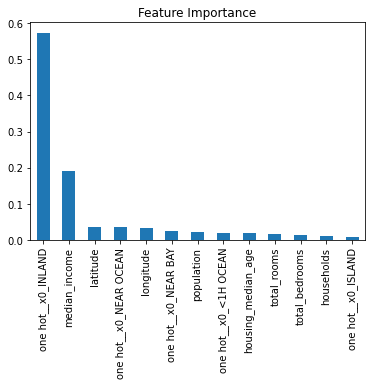

In [63]:
# Plotting feature importances
feature_imp = pd.Series(xgb_tuning['model'].feature_importances_, transformer.get_feature_names()).sort_values(ascending = False)
feature_imp.plot(kind='bar', title='Feature Importance')

Based on the plot, the most important feature is `Ocean Proximity` followed by the `Median Income`.

### **Conclusion**

Using the dataset, the model that is most suitable in predicting the housing price in California is the XGBoost for regression. The metrics used in determining the most suitable model are RMSE, MAE, and MAPE.

When using this model to predict the test set, the MAE, RMSE, and MAPE values are 33136.296166,	50629.133836, and 0.179831, respectively. After hyperparameter tuning, the MAE, RMSE, and MAPE values became 31562.075005, 48342.715085, and 0.169637, respectively. There is a decrease in the values which means that the performance of the model improved after hyperparameter tuning.

The two most important feature are 'Ocean Proximity' and 'Median Income' followed by Location (Latitude and Longitude), population, housing median age, Number of rooms, and Households.

### **Recommendations**

The following are the recommendations to develop or improve the model:

1. Perform better cleaning on our dataset or perform other feature engineering methods like handling the outliers in our dataset and new feature generation.
2. Perform A/B testing to evaluate the model's effectiveness as compared with those who don't use a model in pricing. Compare also which will give a better revenue.


### **Saving the model**

In [66]:
import pickle

In [67]:
estimator = Pipeline([('preprocess', transformer), ('model', XGBRegressor())])
estimator.fit(X_train, y_train)

pickle.dump(estimator, open('Model_CaliforniaHousingPrice_XGB.sav', 'wb'))

In [68]:
# Load model

filename = 'Model_CaliforniaHousingPrice_XGB.sav'
loaded_model = pickle.load(open(filename, 'rb'))

In [69]:
np.sqrt(mean_squared_error(y_test, loaded_model.predict(X_test)))

50654.65505225708